In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import time
import matplotlib.pyplot as plt


os.chdir('../')

In [2]:
location = pd.read_csv('./data/train/Location.csv')
label = pd.read_csv('./data/train/Label.csv')

In [3]:
# Add time rounded to seconds
location['epoch_time_rounded'] = ((location['epoch_time']/1000).round(0)*1000).astype('int64')
#df['time'] = df['epoch_time'].apply(lambda x: time.ctime(x/1000))    

In [4]:
# Merge location and labels
label.rename(columns={'epoch_time': 'epoch_time_rounded'}, inplace=True)
location_label = location.merge(label, on='epoch_time_rounded', how='left')

In [5]:
location_label.head()

,epoch_time,accuracy,Latitude,Longitude,Altitude,epoch_time_rounded,label
0,1490431658118,64.0,50.844494,-0.132922,97.664610,1490431658000,4.0
1,1490431659760,48.0,50.844491,-0.132924,128.267900,1490431660000,4.0
2,1490431660766,48.0,50.844481,-0.132931,135.611425,1490431661000,4.0
3,1490431661765,12.0,50.844469,-0.132930,134.436050,1490431662000,4.0
4,1490431662768,32.0,50.844267,-0.132787,135.993866,1490431663000,4.0


In [6]:
location_label.shape

(911109, 7)

In [7]:
# Calculate difference to get distance and speed
location_diff = location_label.diff()

In [8]:
location_diff.head()

,epoch_time,accuracy,Latitude,Longitude,Altitude,epoch_time_rounded,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1642.0,-16.0,-0.000003,-1.914368e-06,30.603290,2000.0,0.0
2,1006.0,0.0,-0.000010,-6.600000e-06,7.343525,1000.0,0.0
3,999.0,-36.0,-0.000012,4.950000e-07,-1.175375,1000.0,0.0
4,1003.0,20.0,-0.000202,1.435770e-04,1.557816,1000.0,0.0


In [9]:
location_diff['distance'] = (location_diff['Latitude'].pow(2) + location_diff['Longitude'].pow(2)).pow(0.5)
location_diff['speed'] = location_diff['distance']/(location_diff['epoch_time_rounded'])*1000

In [10]:
location_diff.head()

,epoch_time,accuracy,Latitude,Longitude,Altitude,epoch_time_rounded,label,distance,speed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1642.0,-16.0,-0.000003,-1.914368e-06,30.603290,2000.0,0.0,0.000003,0.000002
2,1006.0,0.0,-0.000010,-6.600000e-06,7.343525,1000.0,0.0,0.000012,0.000012
3,999.0,-36.0,-0.000012,4.950000e-07,-1.175375,1000.0,0.0,0.000012,0.000012
4,1003.0,20.0,-0.000202,1.435770e-04,1.557816,1000.0,0.0,0.000248,0.000248


In [11]:
# Merge speed to the main dataframe
location_label = location_label.merge(location_diff[['speed']], left_index=True, right_index=True)

In [12]:
location_label.head()

,epoch_time,accuracy,Latitude,Longitude,Altitude,epoch_time_rounded,label,speed
0,1490431658118,64.0,50.844494,-0.132922,97.664610,1490431658000,4.0,NaN
1,1490431659760,48.0,50.844491,-0.132924,128.267900,1490431660000,4.0,0.000002
2,1490431660766,48.0,50.844481,-0.132931,135.611425,1490431661000,4.0,0.000012
3,1490431661765,12.0,50.844469,-0.132930,134.436050,1490431662000,4.0,0.000012
4,1490431662768,32.0,50.844267,-0.132787,135.993866,1490431663000,4.0,0.000248


<AxesSubplot:>

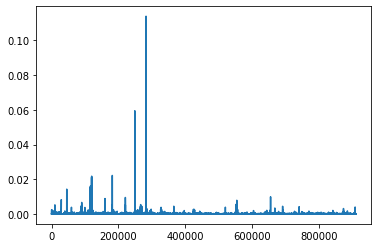

In [13]:
location_label['speed'].plot(kind='line')

In [14]:
location_label.describe()

,epoch_time,accuracy,Latitude,Longitude,Altitude,epoch_time_rounded,label,speed
count,9.111090e+05,911109.000000,911109.000000,911109.000000,911109.000000,9.111090e+05,662506.000000,9.108600e+05
mean,1.495404e+12,11.276893,51.025183,-0.182878,115.062078,1.495404e+12,4.457721,inf
std,2.381766e+09,14.996484,0.402211,0.397163,85.287095,2.381766e+09,1.973792,NaN
min,1.490432e+12,2.000000,50.737946,-2.980204,-643.297744,1.490432e+12,1.000000,0.000000e+00
25%,1.493808e+12,6.000000,50.836309,-0.170117,78.022516,1.493808e+12,3.000000,2.540738e-06
50%,1.495474e+12,8.000000,50.850591,-0.133547,106.818509,1.495474e+12,5.000000,2.005530e-05
75%,1.497354e+12,13.250500,51.035756,-0.113220,134.176102,1.497354e+12,6.000000,7.571556e-05
max,1.499268e+12,400.000000,53.494279,1.056981,7951.600681,1.499268e+12,8.000000,inf


In [15]:
# Remove infinity values
location_label.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
# Calculate average speed by labels
location_label_grouped = location_label[location_label['speed']>0].groupby('label')['speed'].mean().reset_index(name='mean_speed')

In [17]:
location_label_grouped

,label,mean_speed
0,1.0,0.000002
1,2.0,0.000016
2,3.0,0.000027
3,4.0,0.000057
4,5.0,0.000200
5,6.0,0.000080
6,7.0,0.000202
7,8.0,0.000150
